In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv("./train.csv")
dt=pd.read_csv("./test.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df["price_range"].describe(), df['price_range'].unique()

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64, array([1, 2, 3, 0], dtype=int64))

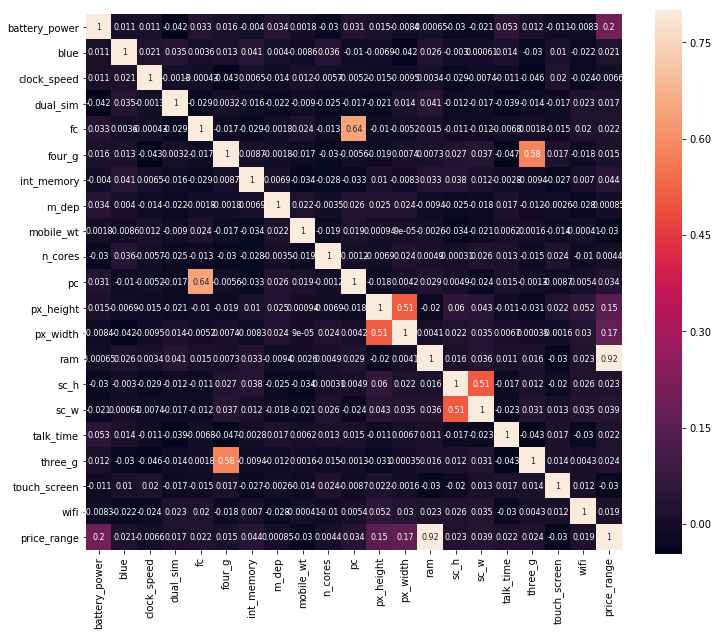

In [5]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

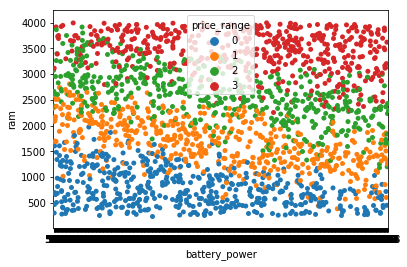

In [6]:
sns.swarmplot(x='battery_power',y='ram',data=df,hue='price_range')
plt.show()

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
X_t=df
X_t=df.drop(['price_range'],axis=1)
y_t=df['price_range']
X_t = np.array(X_t)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)

In [8]:
for i in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='rbf',C=i).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of i:{}, training score :{:2f} , Test Score: {:2f} \n".format(i,scoretrain,scoretest))

Linear SVM value of i:1, training score :0.902500 , Test Score: 0.887500 

Linear SVM value of i:3, training score :0.946250 , Test Score: 0.917500 

Linear SVM value of i:5, training score :0.957500 , Test Score: 0.927500 

Linear SVM value of i:10, training score :0.963750 , Test Score: 0.927500 

Linear SVM value of i:40, training score :0.986250 , Test Score: 0.922500 

Linear SVM value of i:60, training score :0.987500 , Test Score: 0.922500 

Linear SVM value of i:80, training score :0.991250 , Test Score: 0.917500 

Linear SVM value of i:100, training score :0.993125 , Test Score: 0.920000 



In [9]:
from sklearn.model_selection import GridSearchCV
clf=SVC(kernel='rbf',C=20)
param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
clf1 = GridSearchCV(clf,param_grid,cv=5)

clf1.fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
skf = StratifiedKFold(5,random_state=10,shuffle=True)
cross_val_score(clf1,X_train,Y_train,cv=skf)

array([0.87538941, 0.86915888, 0.93146417, 0.90595611, 0.90880503])

In [10]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.24
Test Stratergy :stratified 
 Score :0.24
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.25
Test Stratergy :uniform 
 Score :0.26


In [11]:
X = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


C:\Users\Sanket.Shenvi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


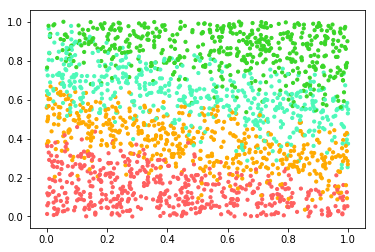

In [12]:
from matplotlib.colors import ListedColormap
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

In [13]:
df.iloc[:,[0,13]].head()

,battery_power,ram
0,842,2549
1,1021,2631
2,563,2603
3,615,2769
4,1821,1411


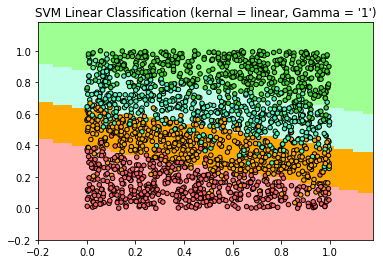

In [14]:
h = .02  # step size in the mesh
C_param = 1
clf1 = SVC(kernel='linear',C=C_param)
clf1.fit(X, y)
x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))
plt.show()

In [15]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.825


In [16]:
A = np.array(dt.iloc[np.arange(1,500),[0,13]])
A = scaler.fit_transform(A)
#X=dt.drop(['price_range'],axis=1)
#y=np.array(dt['price_range'])
#X = np.array(X_t)

C:\Users\Sanket.Shenvi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


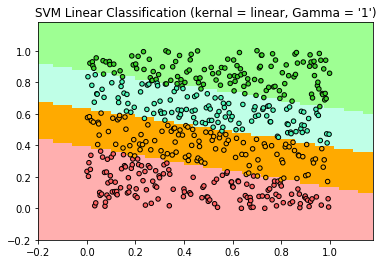

In [17]:
B=clf1.predict(A)
h = .02  # step size in the mesh
C_param = 1
clf1 = SVC(kernel='linear',C=C_param)
clf1.fit(X, y)
x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
plt.scatter(A[:, 0], A[:, 1], c=B, cmap=cm_dark,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))
plt.show()

In [18]:
A.shape

(499, 2)